<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio Visualización

En este laboratorio usaremos el DataFrame de Netflix completo creado en los primeros laboratorios de Pandas. 

**Instrucciones:**

1. Lee cuidadosamente el enunciado de cada ejercicio.

2. Implementa la solución en la celda de código proporcionada.

3. Debes incluir después de cada gráfica la interpretación de las mismas en una celda de markdown. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
# Carga el dataset de trabajo
pd.set_option("display.max_columns", None) #Ver todo
df = pd.read_csv("datos/netflix_union.csv", index_col="Unnamed: 0")


In [2]:

df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,genre,premiere,runtime,IMDB Score,Language
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,Documentary,"October 2, 2020",90.0,7.5,English


#### Ejercicio 1: ¿Cuántos títulos por tipo (Películas vs Series) tenemos?. En esta gráfica deberás: 

- Incluir un título. 

- Cambiar el nombre de los ejes X e Y. 

- Cambiar el color de las barras. 

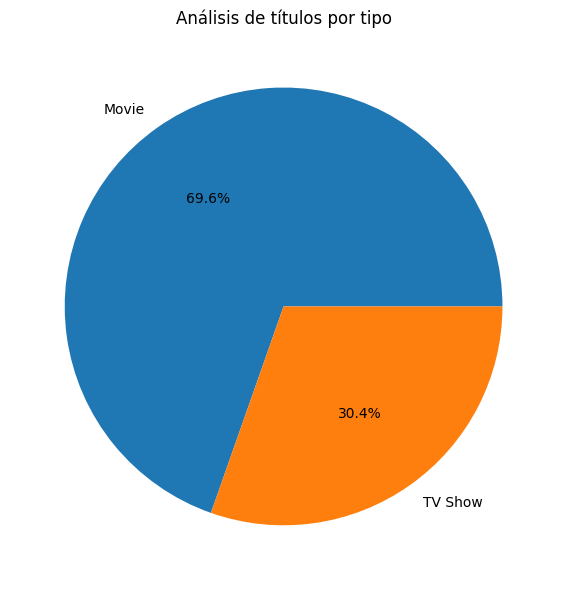

In [3]:
tipos = df["type"].value_counts()
data = [tipos[0],tipos[1]]
plt.figure(figsize=(8,6))
plt.pie(data,labels = tipos.index,autopct='%1.1f%%');
plt.title("Análisis de títulos por tipo")
plt.tight_layout()


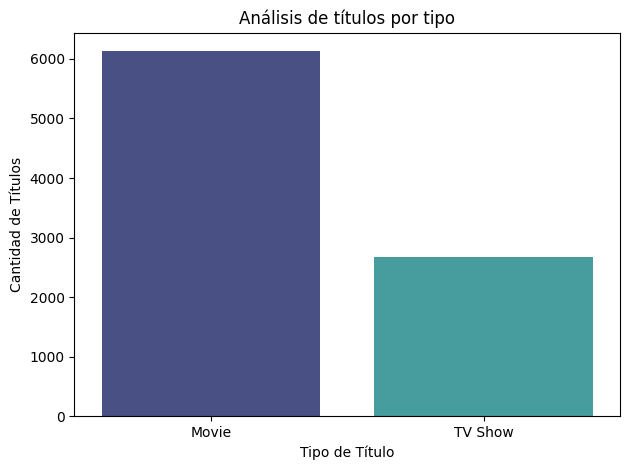

In [5]:
sns.countplot(x="type",data=df,palette="mako");
plt.title("Análisis de títulos por tipo")
plt.xlabel("Tipo de Título")
plt.ylabel("Cantidad de Títulos")
plt.tight_layout()



#### Ejercicio 2: ¿Cuál es la distribución de calificaciones (rating) en los títulos? En esta gráfica deberás:

- Mostrar los resultados ordenados de mayor a menor. 

- Rotar las etiquetas del eje X. 

- Quitar el nombre del eje X. 

- Cambiar el nombre del ehje Y. 

- Ponerle título a la gráfica. 



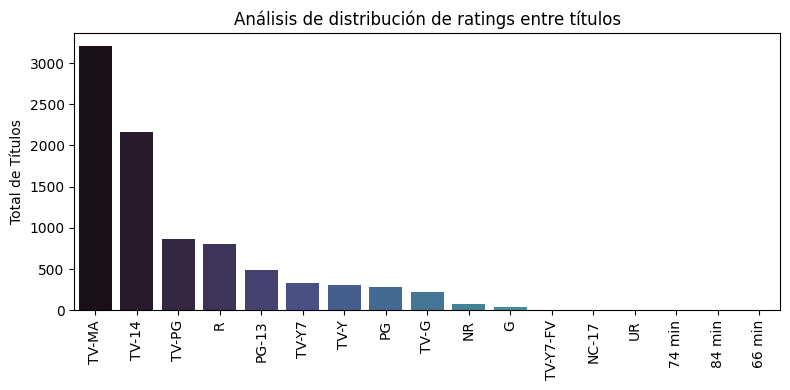

In [6]:
plt.figure(figsize = (8,4))
sns.countplot(x = "rating",
              data=df,
              palette="mako",
              order=df["rating"].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel("")
plt.ylabel("Total de Títulos")
plt.title("Análisis de distribución de ratings entre títulos")
plt.tight_layout()

#### Ejercicio 3: ¿Cuál es el top 10 de países con más títulos disponibles? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 



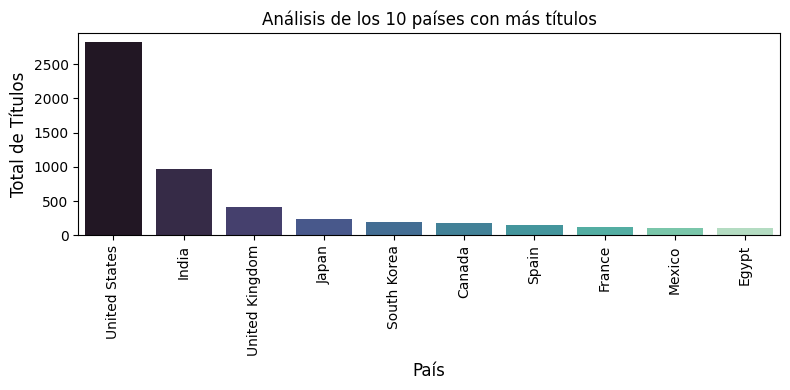

In [7]:
df_topten = df.groupby("country")["title"].count().nlargest(10)
plt.figure(figsize = (8,4))
sns.barplot(x= df_topten.index,
             y= df_topten.values,
             palette="mako")
plt.xlabel("País",fontsize=12)
plt.ylabel("Total de Títulos",fontsize=12)
plt.title("Análisis de los 10 países con más títulos")
plt.xticks(rotation=90)
plt.tight_layout()

#### Ejercicio 5: ¿Cuál es la puntuación promedio de las películas según su calificación? Deberás:


- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 

- Cambia el tamaño de la gráfica a 15 x 5

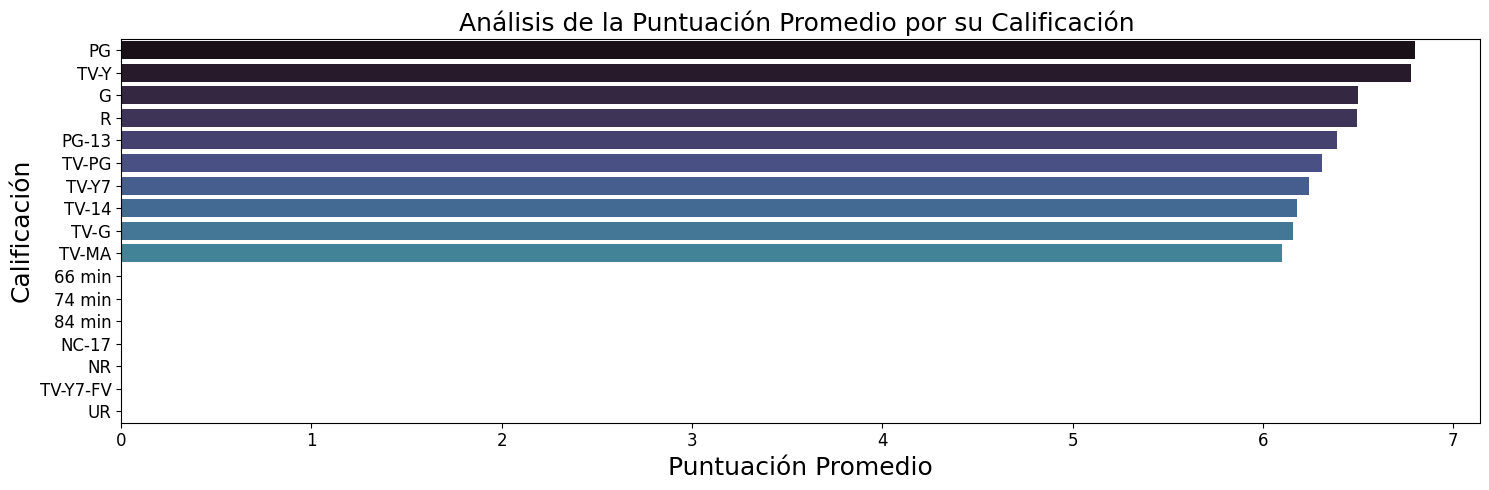

In [8]:
df_promedio = df.groupby("rating")["IMDB Score"].mean(numeric_only=True).sort_values(ascending=False)
plt.figure(figsize = (15,5))
sns.barplot(y= df_promedio.index,
             x= df_promedio.values,
             palette="mako")
plt.ylabel("Calificación",fontsize=18)
plt.xlabel("Puntuación Promedio",fontsize=18)
plt.title("Análisis de la Puntuación Promedio por su Calificación ",fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()



#### Ejercicio 6: ¿Cuál es la relación entre la duración de las películas y su puntuación en IMDb? Deberás:

- Cambiar el tamaño de los puntos. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 


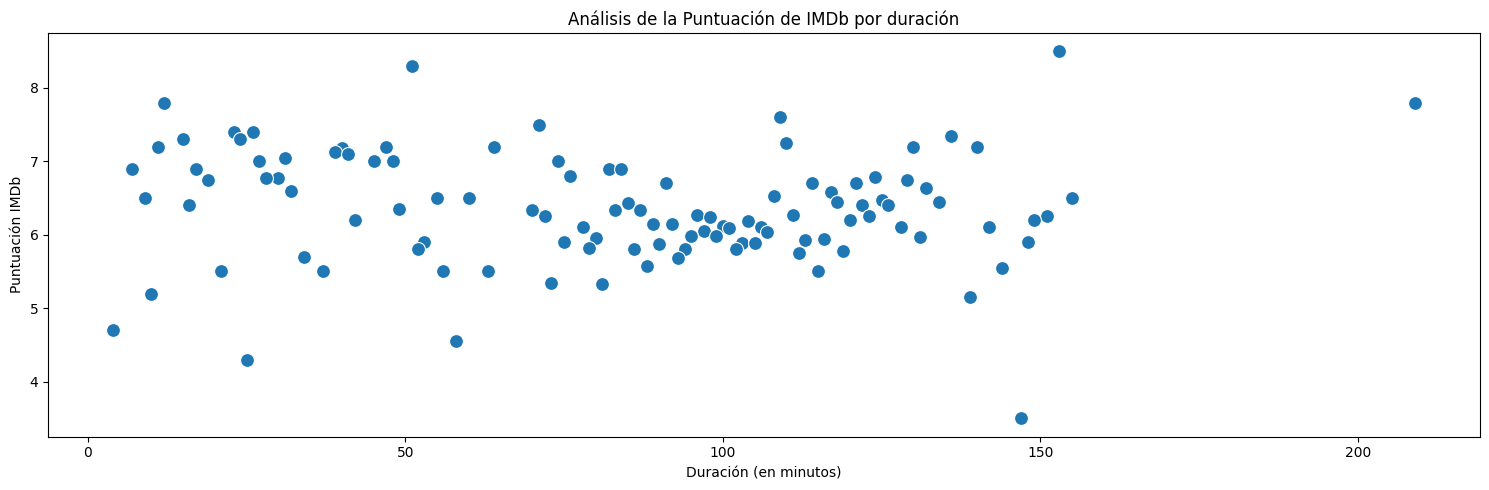

In [9]:
plt.figure(figsize = (15,5))
condicion = df["runtime"].notnull()
df_duracion = df[condicion].groupby("runtime")["IMDB Score"].mean(numeric_only=True).sort_values(ascending=False)

sns.scatterplot(x= df_duracion.index, y=df_duracion.values,s=100)#ci = False, tarde el triple
plt.title("Análisis de la Puntuación de IMDb por duración", fontsize = 12) #título a nuestra gráfica
plt.xlabel("Duración (en minutos)") #Etiqueta eje X
plt.ylabel("Puntuación IMDb") #Etiqueta eje Y
plt.tight_layout()


#### Ejercicio 7: ¿Cómo se distribuye la puntuación en IMDb según los 10 idiomas más usados? Deberás:

- Usa una gráfica que nos muestre la mediana y los cuartiles. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

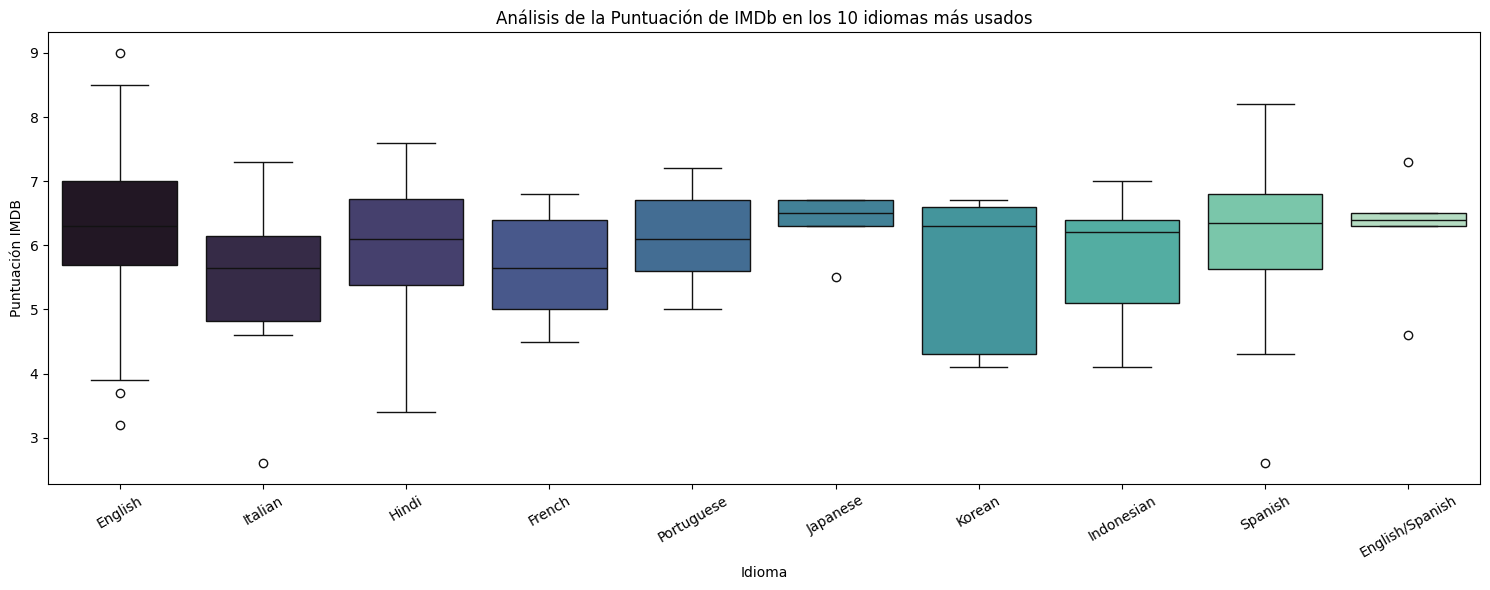

In [27]:
top_10_idiomas = df['Language'].value_counts().nlargest(10).index #Me devuelve el top 10 de paises, al usar index, lo
df_idiomas = df[df["Language"].isin(top_10_idiomas)]
plt.figure(figsize = (15,6))
#sns.violinplot(y='Language', x='IMDB Score', data=df_idiomas)
sns.boxplot(x='Language', y='IMDB Score', data=df_idiomas,palette="mako")
plt.xticks(rotation = 30)
plt.xlabel("Idioma")
plt.ylabel("Puntuación IMDB")
plt.title("Análisis de la Puntuación de IMDb en los 10 idiomas más usados")
plt.tight_layout()


#### Ejercicio 8: ¿Cuáles son los 10 directores que tienen las puntuaciones más altas?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Cambiar el tamaño de la gráfica. 



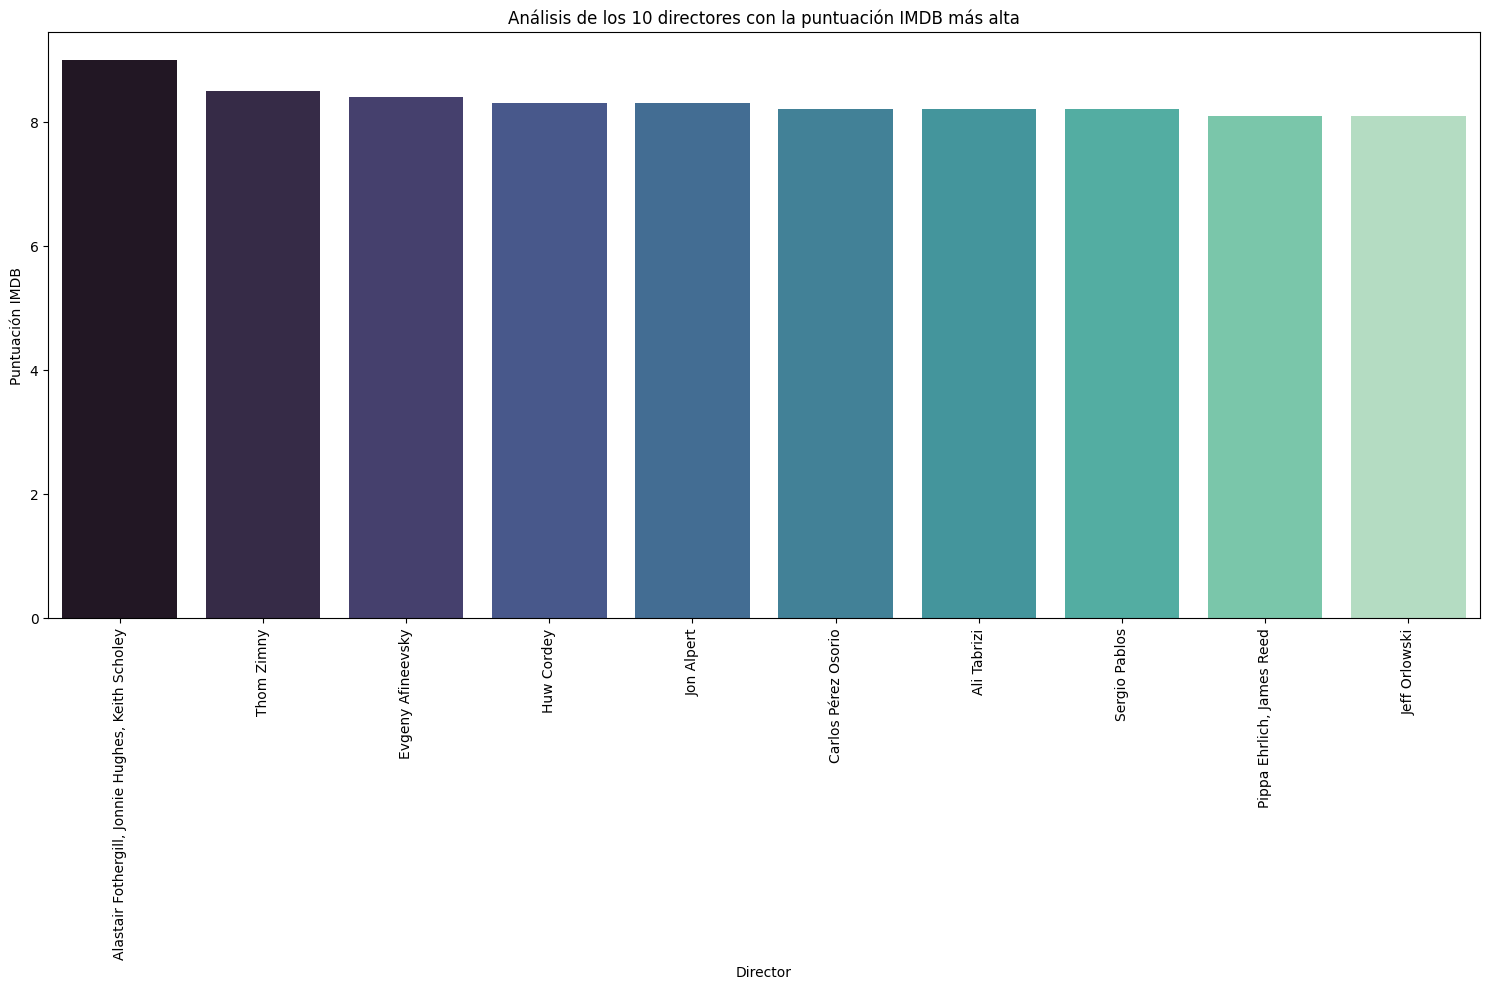

In [55]:
topten = df["IMDB Score"].nlargest(10) #Estaba usando mal el value_counts()
df_topten = df[df["IMDB Score"].isin(topten)].sort_values(by="IMDB Score",ascending=False) #Así la enviamos ya ordenada
plt.figure(figsize = (15,10))
sns.barplot(x="director",y="IMDB Score",data=df_topten,palette="mako")
plt.xticks(rotation = 30)
plt.xlabel("Director")
plt.ylabel("Puntuación IMDB")
plt.title("Análisis de los 10 directores con la puntuación IMDB más alta")
plt.xticks(rotation=90)
plt.tight_layout()



#### Ejercicio 9:  ¿Cuál es la distribución de títulos por tipo y calificación? Soluciona este ejercicio usando subplots. Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 


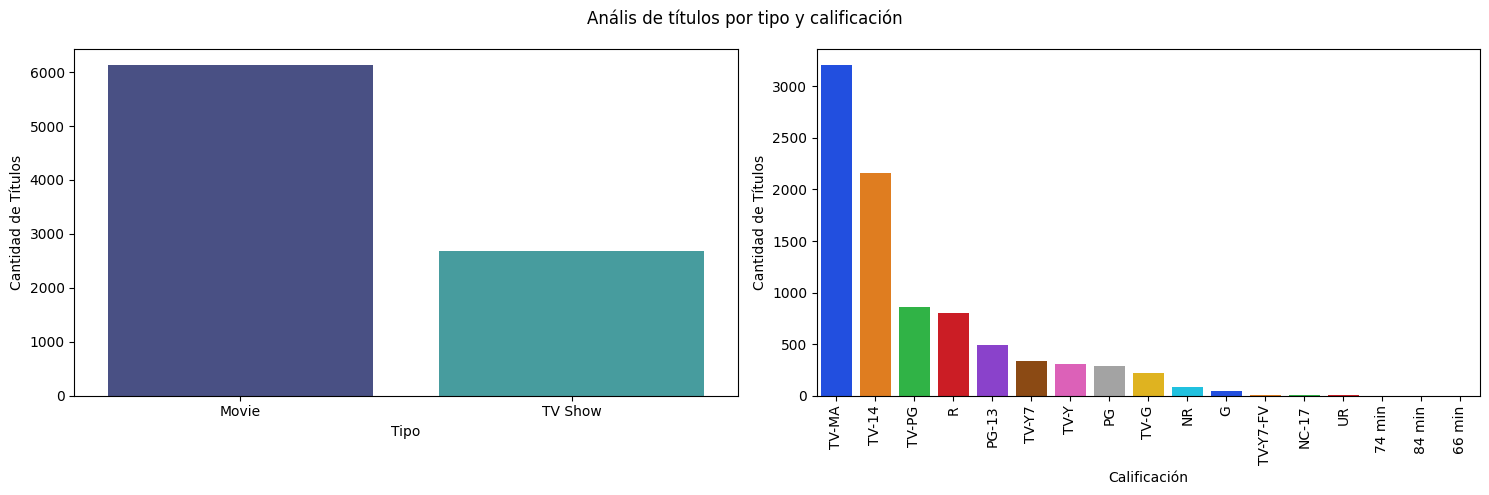

In [107]:
condicion_tipo = df["type"].notnull()
df_tipo = df[condicion_tipo].sort_values(by="rating",ascending=False)

fig, axes = plt.subplots(1,2,figsize = (15,5)) #filas,columnas
sns.countplot(x="type",data = df_tipo,palette="mako", ax = axes[0])#pintamos el primero
sns.countplot(x="rating",data = df_tipo,palette="bright",order=df["rating"].value_counts().index, ax = axes[1])#pintamos el segundo y lo ordenamos
plt.suptitle("Anális de títulos por tipo y calificación")
axes[0].set(xlabel="Tipo",ylabel="Cantidad de Títulos")
axes[1].set(xlabel="Calificación",ylabel="Cantidad de Títulos")
axes[1].tick_params(axis="x",rotation = 90)
plt.tight_layout()


#### Ejercicio 10: tenemos que sacar el numero de pelis y series (el tipo) para los 6 principales paises, mostrando cada pais en un subplot.
- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 



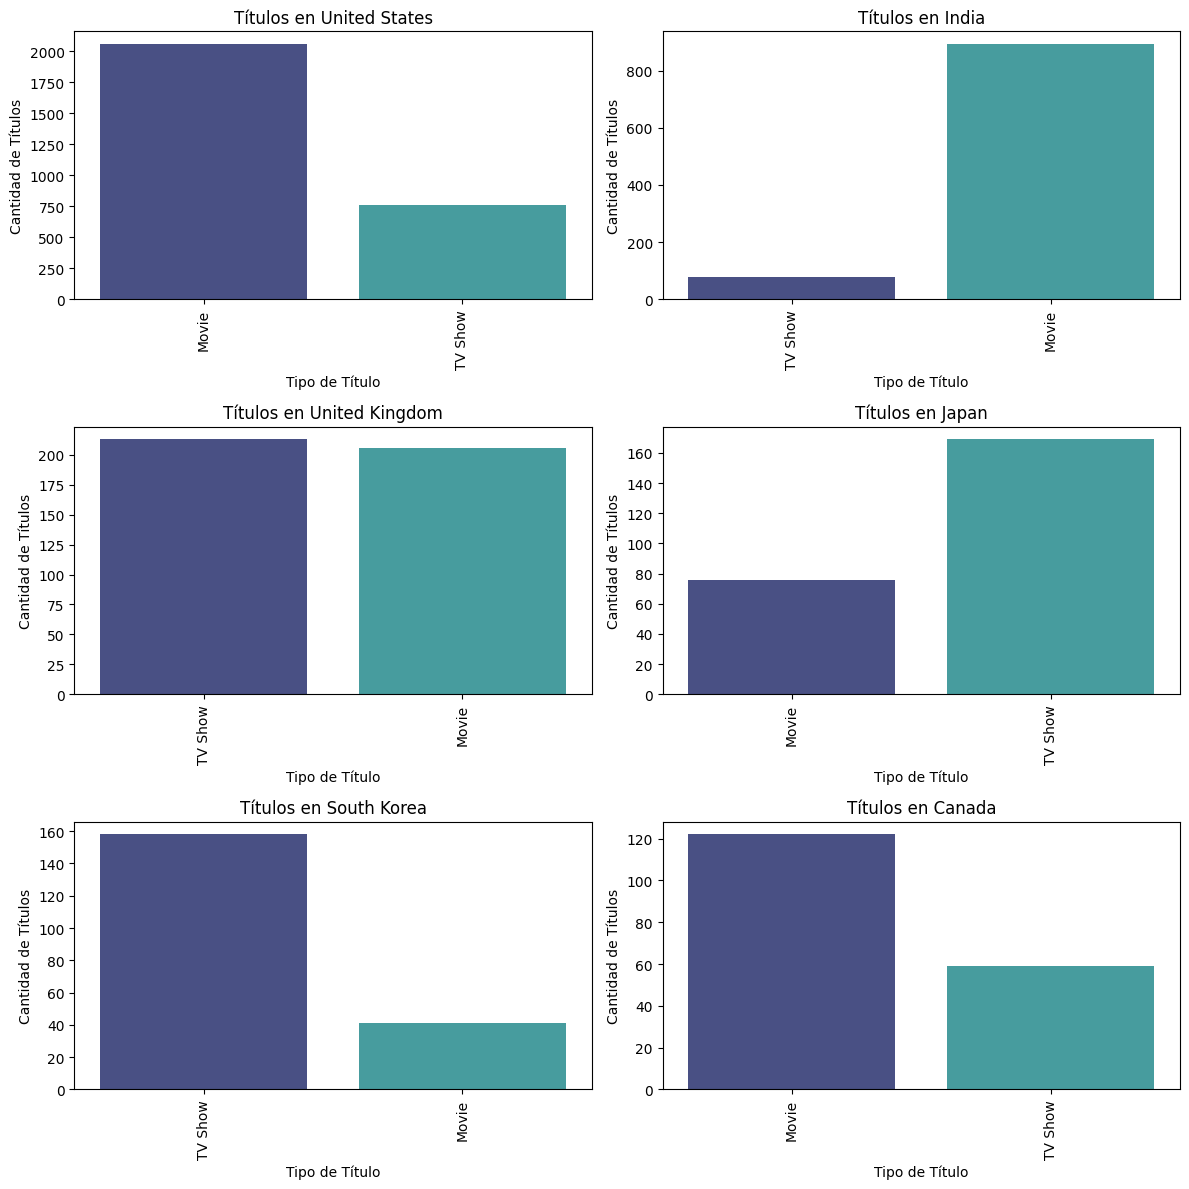

In [154]:
condicion_pais = df["country"].value_counts().nlargest(6).index
df_paises = df[df["country"].isin(condicion_pais)]

fig, axes = plt.subplots(3, 2, figsize=(12, 12)) 
#podéis convertir los ejes de un iterator de 2D a 1D con:
axes = axes.flatten() #lo que dijo Miguel

for i, pais in enumerate(condicion_pais):
    sns.countplot(x="type", data=df_paises[df_paises["country"] == pais], palette="mako", ax=axes[i])
    axes[i].set_title(f'Títulos en {pais}')
    axes[i].set_xlabel('Tipo de Título') 
    axes[i].set_ylabel('Cantidad de Títulos')  
    axes[i].tick_params(axis='x', rotation=90)
plt.tight_layout()



#### Ejercicio 11: ¿Cuál es total de tipos de calificaciones, considerando solo los principales 5 países? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

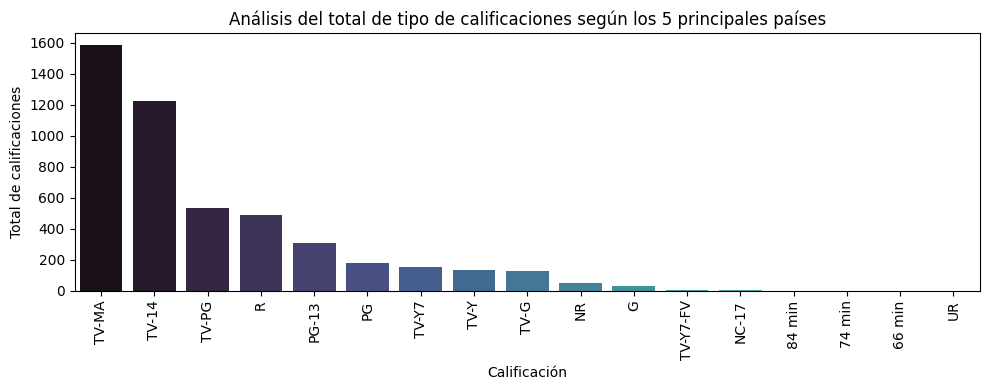

In [167]:
condicion_pais2 = df["country"].value_counts().nlargest(5).index
df_paises2 = df[df["country"].isin(condicion_pais)]

plt.figure(figsize = (10,4))
sns.countplot(x="rating",data=df_paises2,palette="mako",order=df_paises2["rating"].value_counts().index)
plt.xlabel("Calificación")
plt.ylabel("Total de calificaciones")
plt.title("Análisis del total de tipo de calificaciones según los 5 principales países")
plt.xticks(rotation=90)
plt.tight_layout()

#### Ejercicio 12: ¿Cómo se distribuyen las 5 primeras calificaciones  a lo largo de los aúltimo 10 años? 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 

In [184]:
top_ratings = df["rating"].value_counts().nlargest(5).index
df_ratings = df[df["rating"].isin(top_ratings)]
max_año = df_ratings["release_year"].max()
condicion_año = df["release_year"].between(max_año-10,max_año)
df_total = df[condicion_año]
df_total["release_year"].sort_values().unique()
plt.figure(figsize = (10,6))
#sns.violinplot(y='Language', x='IMDB Score', data=df_idiomas)
sns.boxplot(x='Language', y='IMDB Score', data=df_idiomas,palette="mako")
plt.xticks(rotation = 30)
plt.xlabel("Idioma")
plt.ylabel("Puntuación IMDB")
plt.title("Análisis de la Puntuación de IMDb en los 10 idiomas más usados")
plt.tight_layout()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [ ]:
df_idiomas = df[df['Language'].isin(top_10_idiomas)]



### BONUS

#### Ejercicio 13: ¿Cómo ha evolucionado la cantidad de títulos añadidos a lo largo de los años diferenciando entre Películas y Series?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 

- Añade una *grid* al gráfico. 

#### Ejercicio 14: ¿Cómo se distribuyen los títulos según su calificación (rating)? Utiliza un gráfico de “quesitos” para visualizar la proporción de títulos en cada categoría de calificación.

#### Ejercicio 15: ¿Cómo se distribuyen los títulos según su calificación (rating) y tipo (Películas vs Series)? Utiliza un gráfico countplot con el parámetro hue para diferenciar entre películas y series en cada calificación.